# Wikipedia Notable Life Expectancies
# [Notebook 11: Linear Regression Model ](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_data_olsmodel_thanak_2022_10_9.ipynb)
### Context

The
### Objective

The
### Data Dictionary
- Feature: Description

### Importing Libraries

In [1]:
# To structure code automatically
%load_ext nb_black

# To import/export sqlite databases
# import sqlite3 as sql

# To save/open python objects in pickle file
import pickle

# To help with reading, cleaning, and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# randomized data splitting
from sklearn.model_selection import train_test_split

# building regression model
import statsmodels.api as sm

# check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# check linear regression assumptions
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pylab
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# to compare fit between models
from scipy.stats.distributions import chi2

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# To define the maximum number of rows to be displayed in a dataframe
pd.set_option("display.max_rows", 211)

# To set some dataframe visualization attributes
pd.set_option("max_colwidth", 150)

# To supress scientific notations for a dataframe
# pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
# import warnings

# warnings.filterwarnings("ignore")

# To set some plot visualization attributes
sns.set_theme()
sns.set(font_scale=1.4)
sns.set_palette(
    (
        "midnightblue",
        "goldenrod",
        "maroon",
        "darkolivegreen",
        "cadetblue",
        "tab:purple",
        "yellowgreen",
    )
)
# plt.rc("font", size=12)
# plt.rc("axes", titlesize=15)
# plt.rc("axes", labelsize=14)
# plt.rc("xtick", labelsize=13)
# plt.rc("ytick", labelsize=13)
# plt.rc("legend", fontsize=13)
# plt.rc("legend", fontsize=14)
# plt.rc("figure", titlesize=16)

# To play auditory cue when cell has executed, has warning, or has error and set chime theme
import chime

chime.theme("zelda")

<IPython.core.display.Javascript object>

## Data Overview

### [Reading](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_preproc.csv), Sampling, and Checking Data Shape

In [2]:
# Reading the train set
data = pd.read_csv("wp_life_expect_preproc.csv")

# Making a working copy
df = data.copy()

# Checking the shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# Checking first 2 rows of the data
df.head(2)

There are 77624 rows and 20 columns.


,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
0,4,73.0,0,0,1,0,0,0,0,0,0,0,1,5329.0,0.250000,8,64,Europe,No Prior Region,spiritual
1,3,90.0,1,0,0,1,0,0,0,0,0,0,2,8100.0,0.333333,13,169,North America,No Prior Region,two


<IPython.core.display.Javascript object>

In [3]:
# Checking last 2 rows of the data
df.tail(2)

,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
77622,7,74.0,0,0,0,0,0,1,0,0,0,0,1,5476.0,0.142857,0,0,North America,No Prior Region,arts
77623,5,92.0,0,0,0,0,0,0,1,0,0,0,1,8464.0,0.200000,8,64,Europe,No Prior Region,sports


<IPython.core.display.Javascript object>

In [4]:
# Checking a sample of the data
df.sample(5)

,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
63563,5,81.0,0,0,0,0,0,0,0,0,1,0,1,6561.0,0.200000,22,484,North America,No Prior Region,politics_govt_law
22780,11,100.0,0,0,0,1,0,1,0,0,0,0,2,10000.0,0.090909,21,441,North America,No Prior Region,two
37936,5,56.0,0,0,0,0,0,1,0,0,0,0,1,3136.0,0.200000,22,484,Europe,No Prior Region,arts
35245,4,92.0,0,0,0,0,0,0,1,0,0,0,1,8464.0,0.250000,15,225,North America,No Prior Region,sports
62187,5,92.0,0,0,0,0,0,0,0,0,1,0,1,8464.0,0.200000,26,676,Europe,No Prior Region,politics_govt_law


<IPython.core.display.Javascript object>

### Checking Data Types and Null Values

In [5]:
# Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77624 entries, 0 to 77623
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_references             77624 non-null  int64  
 1   age                        77624 non-null  float64
 2   sciences                   77624 non-null  int64  
 3   social                     77624 non-null  int64  
 4   spiritual                  77624 non-null  int64  
 5   academia_humanities        77624 non-null  int64  
 6   business_farming           77624 non-null  int64  
 7   arts                       77624 non-null  int64  
 8   sports                     77624 non-null  int64  
 9   law_enf_military_operator  77624 non-null  int64  
 10  politics_govt_law          77624 non-null  int64  
 11  crime                      77624 non-null  int64  
 12  num_categories             77624 non-null  int64  
 13  age_sqrd                   77624 non-null  flo

<IPython.core.display.Javascript object>

#### Observations:
- With our dataset loaded, we are ready for modeling.
- We have three variables that need typcasting from object to category, then one hot encoding just prior to modeling.

#### Typecasting `region`, `prior_region`, and `known_for` as Categorical

In [6]:
# Typcasting prior_region and region as categorical
df[["prior_region", "region", "known_for"]] = df[
    ["prior_region", "region", "known_for"]
].astype("category")

# Re-check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77624 entries, 0 to 77623
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   num_references             77624 non-null  int64   
 1   age                        77624 non-null  float64 
 2   sciences                   77624 non-null  int64   
 3   social                     77624 non-null  int64   
 4   spiritual                  77624 non-null  int64   
 5   academia_humanities        77624 non-null  int64   
 6   business_farming           77624 non-null  int64   
 7   arts                       77624 non-null  int64   
 8   sports                     77624 non-null  int64   
 9   law_enf_military_operator  77624 non-null  int64   
 10  politics_govt_law          77624 non-null  int64   
 11  crime                      77624 non-null  int64   
 12  num_categories             77624 non-null  int64   
 13  age_sqrd                   7762

<IPython.core.display.Javascript object>

## Building a Linear Regression Model

### Data Preparation for Modeling
As there is no model tuning in this ordinary least squares model, we will train directly with the `train` set and check performance directly on the `test` set.  The `test` set needs these treatments first:
1. Drop non-human entries.
1. Drop entries with `event_record_other` as sole category.
1. Drop entries with age below 18.
1. Drop `place_2` values that are duplicates of `place_1`.
1. Add the following columns:  
    a. `age_sqrd`  
    b. `recip_num_references`  
    c. `years`  
    d. `years_sqrd`  
    e. `region`  
    f. `prior_region`    
    g. `known_for`  
1. Typcast categorical predictors.
1. Drop unnecessary columns.
1. Missing value treatment.

We will perform one hot encoding of remaining categorical variables on both `train` and `test` when we define independent and dependent variables, `X` and `y`.

### Test Set

#### Loading [Test Set](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_test.csv) and [region_place_dict](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/region_place_dict.pkl)

In [80]:
# Reading test.csv
test = pd.read_csv("wp_life_expect_test.csv")

# Checking shape
print(f"There are {test.shape[0]} rows and {test.shape[1]} columns in the test set.")

# Loading region_place_dict
with open("region_place_dict.pkl", "rb") as f:
    region_place_dict = pickle.load(f)

There are 19608 rows and 25 columns in the test set.


<IPython.core.display.Javascript object>

In [81]:
# Checking info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19608 entries, 0 to 19607
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   day                        19608 non-null  int64  
 1   name                       19608 non-null  object 
 2   info                       19608 non-null  object 
 3   link                       19608 non-null  object 
 4   num_references             19608 non-null  int64  
 5   year                       19608 non-null  int64  
 6   month                      19608 non-null  object 
 7   info_parenth               6832 non-null   object 
 8   age                        19608 non-null  float64
 9   cause_of_death             6641 non-null   object 
 10  place_1                    19580 non-null  object 
 11  place_2                    1193 non-null   object 
 12  sciences                   19608 non-null  int64  
 13  social                     19608 non-null  int

<IPython.core.display.Javascript object>

#### Pre-processing Steps

In [82]:
%%time

# 1. Dropping non-human entries
rows_to_drop = test[test["other_species"] == 1].index
test.drop(rows_to_drop, inplace=True)
test.reset_index(inplace=True, drop=True)

# 2. Dropping entries with event_record_other as sole category
rows_to_drop = test[(test['event_record_other']==1) & (test['num_categories']==1)].index
test.drop(rows_to_drop, inplace=True)
test.reset_index(inplace=True, drop=True)

# 3. Dropping entries with age < 18 
rows_to_drop = test[test['age'] < 18].index
test.drop(rows_to_drop, inplace=True)
test.reset_index(inplace=True, drop=True)

# 4. Dropping place_2 values that are duplicates of place_1
index = [index for index in test.index if test.loc[index, 'place_2']==test.loc[index, 'place_1']]
test.loc[index, 'place_2']==None

# 5a. Creating age_sqrd column
test['age_sqrd'] = test['age']**2

# 5b. Creating recip_num_references column
test["recip_num_references"] = test["num_references"].apply(lambda x: 1 / x)

# 5c. Creating years column
test['years'] = test['year'] - 1994

# 5d. Creating years_sqrd column
test['years_sqrd'] = test['years']**2

# 5e. Creating region column
# For loop to create region column
test["region"] = None
for region, places in region_place_dict.items():
    for place in places:
        for index in test[(test["region"].isna()) & (test["place_2"].notna())].index:
            item = test.loc[index, "place_2"]
            if item:
                if item == place:
                    test.loc[index, "region"] = region
        for index in test[(test["region"].isna()) & (test["place_2"].isna())].index:
            item = test.loc[index, "place_1"]
            if item:
                if item == place:
                    test.loc[index, "region"] = region

# 5f. Creating prior_region column
# For loop to create prior_region column
test["prior_region"] = None
for region, places in region_place_dict.items():
    for place in places:
        for index in test[
            (test["place_2"].notna()) & (test["prior_region"].isna())
        ].index:
            item = test.loc[index, "place_1"]
            if item:
                if item == place:
                    test.loc[index, "prior_region"] = region
# Adding No Prior Region category
test["prior_region"].fillna("No Prior Region", inplace=True)

# 5g. Creating known_for column
# Initializing known_for
test['known_for']=None
# List of known for columns
cols = ['sciences', 'social', 'spiritual', 'academia_humanities',
       'business_farming', 'arts', 'sports', 'law_enf_military_operator',
       'politics_govt_law', 'crime', 'event_record_other', 'other_species']
# For loop to assign known_for
for index in test[test['known_for'].isna()].index:
    if test.loc[index, 'num_categories']==2:
        test.loc[index, 'known_for'] = 'two'
    elif test.loc[index, 'num_categories'] > 2:
        test.loc[index, 'known_for'] = 'three_to_five'
    else: 
        for column in cols:
            if test.loc[index, column]==1:
                test.loc[index, 'known_for'] = column

# 8. Typecasting categorical predictors
test[['region', 'prior_region', 'known_for']] = test[['region', 'prior_region', 'known_for']].astype('category')

# 9. Dropping Unnecessary Columns
cols_to_drop = [
   'day', 'name', 'info', 'link', 'year', 'month',
       'info_parenth', 'cause_of_death', 'place_1', 'place_2',
       'event_record_other', 'other_species',
]
test.drop(cols_to_drop, axis=1, inplace=True)

# Rechecking columns
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19420 entries, 0 to 19419
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   num_references             19420 non-null  int64   
 1   age                        19420 non-null  float64 
 2   sciences                   19420 non-null  int64   
 3   social                     19420 non-null  int64   
 4   spiritual                  19420 non-null  int64   
 5   academia_humanities        19420 non-null  int64   
 6   business_farming           19420 non-null  int64   
 7   arts                       19420 non-null  int64   
 8   sports                     19420 non-null  int64   
 9   law_enf_military_operator  19420 non-null  int64   
 10  politics_govt_law          19420 non-null  int64   
 11  crime                      19420 non-null  int64   
 12  num_categories             19420 non-null  int64   
 13  age_sqrd                   1942

<IPython.core.display.Javascript object>

In [83]:
# Checking a sample of rows
test.sample(5)

,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
9827,4,74.0,0,0,0,0,0,1,0,0,0,0,1,5476.0,0.250000,4,16,North America,No Prior Region,arts
7885,74,88.0,0,0,0,1,0,0,0,0,0,0,1,7744.0,0.013514,11,121,North America,No Prior Region,academia_humanities
6887,36,83.0,0,0,0,0,1,0,0,0,1,0,2,6889.0,0.027778,21,441,Middle East,No Prior Region,two
10446,9,21.0,0,0,0,0,0,1,0,0,0,0,1,441.0,0.111111,27,729,Asia,No Prior Region,arts
11386,9,82.0,0,0,0,1,0,1,0,0,0,0,2,6724.0,0.111111,28,784,North America,No Prior Region,two


<IPython.core.display.Javascript object>

#### Observations:
- Treatment of `test` missing values is the only remaining step.
- We will use the modes for the `known_for` groups from `train` to fill missing values for `test` to avoid data leakage.  `region` is the only column with missing values.

#### Treating Missing Values for `region` in Test

In [84]:
# Checking the starting missing values
print(f'There are {test["region"].isna().sum()} missing values.')

There are 20 missing values.


<IPython.core.display.Javascript object>

In [85]:
# For loop to impute test missing values with mode of train rows with grouped by known_for
for index in test[test["region"].isna()].index:
    group = test.loc[index, "known_for"]
    group_mode = df[df["known_for"] == group]["region"].mode().iloc[0]
    test.loc[index, "region"] = group_mode

# Treating any remaining missing region values with train region column mode
column_mode = df["region"].mode().iloc[0]
test["region"].fillna(column_mode, inplace=True)

#  Checking missing values after treatment
print(f'There are {test["region"].isna().sum()} missing values.')

# Checking region value_counts
test["region"].value_counts()

There are 0 missing values.


North America                 8050
Europe                        6132
Asia                          1637
Oceania                        981
Africa                         676
Middle East                    460
South America                  441
Mid-Cent America/Caribbean     389
Russian Federation             325
South East Asia                310
Central Asia                    19
Name: region, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- `train` and `test` are both ready for modeling.
- We will perform one hot encoding when defining our independent variables.

### Modeling with `years_sqrd`,  `recip_num_references` Transformations
See [Appendix](#Appendix) for model with untreated predictor and target variables, which served as a starting point for testing and addressing assumptions of linear regression.  Mutliple iterations were performed with various transformations of the target and numeric predictors, in various combinations.  Ultimately, the transformations identified in EDA are included in the final model, as they best satisfied the assumptions for linear regression, without abandoning all potential for interpretation.  

The assumption of normality of the distribution of the residuals is much better met with including the `age_sqrd` transformation.  However, doing so considerably complicated innterpretability, so we have left it out.

#### Defining Independent and Dependent Variables for Train and Test Sets

In [135]:
# Creating list of predictor columns
predictor_cols = [
    "num_references",
    "years_sqrd",
    "region",
    "prior_region",
    "known_for",
]

# Defining target column
target = "age_sqrd"

# Defining independent and dependent variables
X_train, X_test = df[predictor_cols], test[predictor_cols]
y_train, y_test = df[target], test[target]


# One hot encoding independent categorical features
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Adding the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Typecasting independent variables as float
X_train = X_train.astype("float64")
X_test = X_test.astype("float64")

# Checking shape of train and test sets
print(f"There are {X_train.shape[0]} rows and {X_train.shape[1]} columns in X_train.")
print(f"There are {X_test.shape[0]} rows and {X_test.shape[1]} columns in X_test.\n")

# Checking a sample of train set
X_train.sample(2)

There are 77624 rows and 35 columns in X_train.
There are 19420 rows and 35 columns in X_test.



,const,num_references,years_sqrd,region_Asia,region_Central Asia,region_Europe,region_Mid-Cent America/Caribbean,region_Middle East,region_North America,region_Oceania,region_Russian Federation,region_South America,region_South East Asia,prior_region_Asia,prior_region_Central Asia,prior_region_Europe,prior_region_Mid-Cent America/Caribbean,prior_region_Middle East,prior_region_No Prior Region,prior_region_North America,prior_region_Oceania,prior_region_Russian Federation,prior_region_South America,prior_region_South East Asia,known_for_arts,known_for_business_farming,known_for_crime,known_for_law_enf_military_operator,known_for_politics_govt_law,known_for_sciences,known_for_social,known_for_spiritual,known_for_sports,known_for_three_to_five,known_for_two
21625,1.0,7.0,676.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26428,1.0,3.0,400.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<IPython.core.display.Javascript object>

In [136]:
# Checking a sample of test set
X_test.sample(2)

,const,num_references,years_sqrd,region_Asia,region_Central Asia,region_Europe,region_Mid-Cent America/Caribbean,region_Middle East,region_North America,region_Oceania,region_Russian Federation,region_South America,region_South East Asia,prior_region_Asia,prior_region_Central Asia,prior_region_Europe,prior_region_Mid-Cent America/Caribbean,prior_region_Middle East,prior_region_No Prior Region,prior_region_North America,prior_region_Oceania,prior_region_Russian Federation,prior_region_South America,prior_region_South East Asia,known_for_arts,known_for_business_farming,known_for_crime,known_for_law_enf_military_operator,known_for_politics_govt_law,known_for_sciences,known_for_social,known_for_spiritual,known_for_sports,known_for_three_to_five,known_for_two
6951,1.0,11.0,256.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8744,1.0,5.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<IPython.core.display.Javascript object>

#### Observations:
- We are ready to build our model.
- The references levels for the categorical features are as follows:
    - `region`: Africa
    - `prior_region`: Africa
    - `known_for` academia_humanities

### Fitting a Linear Model

In [137]:
# Fitting a linear model and displaying model summary
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:               age_sqrd   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     231.9
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        05:29:42   Log-Likelihood:            -7.0339e+05
No. Observations:               77624   AIC:                         1.407e+06
Df Residuals:                   77589   BIC:                         1.407e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

### Model Performance Check

#### Function to Check Model Performance

In [138]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs((targets - predictions) / targets)) * 100


# function to compute and display different metrics to check performance of a regression model
# with conversion back to original scale for RMSE, MAE, and MAPE for ease of explainability
def model_performance_regression(model, predictors, target):
    """
    Function to compute and return a dataframe of different metrics to check
    regression model performance
    
    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    # predictions
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

#### Model Performance on Train Set (***original scale for RMSE, MAE, MAPE***)

In [139]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2085.066294,1685.710584,0.092252,0.091842,50.54866


<IPython.core.display.Javascript object>

#### Model Performance on Test Set (***original scale for RMSE, MAE, MAPE***)

In [140]:
# Checking model performance on validation set
print("Test Peformance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Peformance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2077.843608,1681.24748,0.089402,0.087758,49.231415


<IPython.core.display.Javascript object>

### Observations:
- The train and test $R^2$ are at 0.094 and 0.091, respectively, indicating that the model explains % of total variation in both sets, so a very small amount, but not nothing.
- RMSE values for the two sets are also comparable, at ~15.
- The comparable results between the two sets show that the model is not overfitting.
- MAE indicates that our current model is able to predict age of reported deceased notable Wikipedia individuals within a mean error of ~11.5 years on the test set.
- MAPE of 19% on the test set means that we are able to predict within ~19% of the reported age, in years.

### Checking Linear Regression Assumptions

### Test for Multicollinearity

#### Function to check VIF of Each Independent Variable

In [141]:
# Define a function to check and display VIF of each independent variable
def checking_vif(predictors):
    """
    Takes input dependent variables predictors and returns
    a dataframe of variable name and VIF
    """
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

#### VIF

In [142]:
# Checking vif
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,382.558081
18,prior_region_No Prior Region,16.896465
15,prior_region_Europe,10.309959
8,region_North America,7.835054
24,known_for_arts,7.488755
5,region_Europe,7.115987
32,known_for_sports,5.416068
28,known_for_politics_govt_law,5.004677
34,known_for_two,4.388991
3,region_Asia,3.185954


<IPython.core.display.Javascript object>

#### Observations:
- The majority of predictors have low VIF (< 5), which is good.
- We will accept the higher VIF value belonging to the constant as the constant is necessary for the residuals to have zero mean, avoiding bias.
- We will proceed by checking the impact on performance of dropping each of the high VIF columns, and drop the column with the least impact on performance, then re-evaluate VIF.  
- This process is iterative until we have all low VIF columns.
- When dropping dummy variables, we will add the dropped class to the reference class.

#### Function to Treat Multicollinearity

In [143]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

#### Checking Impact of Dropping Columns on Model Performance

In [144]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,prior_region_No Prior Region,0.091754,2085.650906
1,known_for_politics_govt_law,0.091093,2086.409863
2,prior_region_Europe,0.091075,2086.430495
3,known_for_arts,0.088215,2089.710519
4,known_for_sports,0.083000,2095.678673
5,region_Europe,0.080343,2098.712623
6,region_North America,0.079033,2100.206296


<IPython.core.display.Javascript object>

#### Observations:
- Of the high VIF columns, `prior_region_No Prior Region` has the least impact on performance when dropped, so we will drop it.

#### Dropping `prior_region_No Prior Region`

In [145]:
# Dropping prior_region_No Prior Region column
col_to_drop = "prior_region_No Prior Region"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,64.515699
8,region_North America,7.832197
23,known_for_arts,7.488431
5,region_Europe,7.114913
31,known_for_sports,5.416056
27,known_for_politics_govt_law,5.004670
33,known_for_two,4.388921
3,region_Asia,3.184330
28,known_for_sciences,2.683460
9,region_Oceania,2.312279


<IPython.core.display.Javascript object>

#### Checking Impact of Dropping Columns on Model Performance

In [146]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,known_for_politics_govt_law,0.090993,2086.525009
1,known_for_arts,0.088107,2089.834427
2,known_for_sports,0.082903,2095.789005
3,region_Europe,0.080214,2098.859882
4,region_North America,0.078883,2100.377135


<IPython.core.display.Javascript object>

#### Observations:
- Of the remaining high VIF columns, `known_for_politics_govt_law` has the least impact on performance when dropped, so we will drop it.

#### Dropping `known_for_politics_govt_law`

In [147]:
# Dropping known_for_politics_govt_law column
col_to_drop = "known_for_politics_govt_law"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,36.224731
8,region_North America,7.809377
5,region_Europe,7.084605
3,region_Asia,3.181368
9,region_Oceania,2.310454
23,known_for_arts,1.853687
7,region_Middle East,1.725316
11,region_South America,1.661570
30,known_for_sports,1.627469
6,region_Mid-Cent America/Caribbean,1.551419


<IPython.core.display.Javascript object>

#### Checking Impact of Dropping Columns on Model Performance

In [148]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,region_Europe,0.079008,2100.235199
1,region_North America,0.077740,2101.679770


<IPython.core.display.Javascript object>

#### Observations:
- That iteration got us down to two remaining high VIF columns.
- Of the remaining high VIF columns, `region_Europe` has the least impact on performance when dropped, so we will drop it.

#### Dropping `region_Europe`

In [149]:
# Dropping region_Europe column
col_to_drop = "region_Europe"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,10.689844
22,known_for_arts,1.839249
29,known_for_sports,1.617961
31,known_for_two,1.470876
7,region_North America,1.301192
26,known_for_sciences,1.251122
3,region_Asia,1.155257
25,known_for_law_enf_military_operator,1.136820
28,known_for_spiritual,1.092425
8,region_Oceania,1.092138


<IPython.core.display.Javascript object>

#### Observations:
- `prior_region_No Prior Region`, `known_for_politics_govt_law`, and `region_Europe` columns were dropped and there are no remaining high VIF columns, excluding the constant, which we will retain.
- **So, the assumption of independence of predictor variables (absence of multicollinearity) is satisfied.**
- The updated reference levels for each feature are as follows:
    - `region`: Africa OR Europe
    - `prior_region`: Africa OR No Prior Region
    - `known_for`: academia_humanities OR politics_govt_law
- Next, we will fit our second model, then drop columns with high p-values for their coefficients.

#### Fitting Second Model

In [150]:
# Fitting a linear model and displaying model summary
olsmodel2 = sm.OLS(y_train, X_train).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:               age_sqrd   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     215.8
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        05:30:50   Log-Likelihood:            -7.0394e+05
No. Observations:               77624   AIC:                         1.408e+06
Df Residuals:                   77592   BIC:                         1.408e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

#### Checking Features with High Coefficient p-values

In [151]:
## Loop for Dropping variables with high coefficient p-values one at a time excluding constant and dummy variables
# Current model predictors
train_predictors = X_train

# initial list of all independent variable columns including constant
cols = train_predictors.columns.to_list()

# initial empty list of independent variables to exclude
excluded_features = []

# setting an initial max p_value
max_p_value = 1

for i in range(len(cols)):
    # defining the train set
    x_train_aux = train_predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues[cols]
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
        excluded_features.append(feature_with_p_max)
    else:
        break

print(f"Features with high p-values to exclude: {excluded_features}")

Features with high p-values to exclude: ['prior_region_South America', 'prior_region_Central Asia', 'known_for_social', 'region_Oceania', 'prior_region_Mid-Cent America/Caribbean', 'prior_region_North America', 'prior_region_Oceania', 'prior_region_Asia', 'known_for_business_farming']


<IPython.core.display.Javascript object>

#### Dropping `excluded_features` with High p-values

In [152]:
# Dropping excluded_features
X_train.drop(excluded_features, axis=1, inplace=True)
X_test.drop(excluded_features, axis=1, inplace=True)

<IPython.core.display.Javascript object>

#### Observations:
- We dropped several columns with high p-values.
- The updated reference levels for each feature are as follows:
    - `region`: Africa, Europe, OR Oceania
    - `prior_region`: Africa, No Prior Region, Central Asia, South America, Mid-Cent America/Caribbean, Oceania, North America, OR Asia
    - `known_for`: academia_humanities, politics_govt_law, social, business_farming

#### Fitting Third Model

In [153]:
# fitting third model and printing summary
olsmodel3 = sm.OLS(y_train, X_train).fit()
print(olsmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:               age_sqrd   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     303.6
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        05:30:58   Log-Likelihood:            -7.0394e+05
No. Observations:               77624   AIC:                         1.408e+06
Df Residuals:                   77601   BIC:                         1.408e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

#### Observations:
- Adjusted $R^2$ has held at 0.081 after dropping the high p-value columns, indicating that the dropped variables were not affecting the model much at all.
- **Now, no other feature, including the constant, has a p-value greater than 0.05, so we will consider these features as the final set of predictor variables and *olsmodel3* as the final model.**
- *olsmodel3* has 23 predictors plut the constant term.
- We will now check the remaining assumptions for linear regression.

### Test for Linearity and Independence

#### Dataframe of Actual, Fitted, and Residual Values

In [154]:
# dataframe of actual, fitted, and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel3.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel3.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,5329.0,6659.007371,-1330.007371
1,8100.0,6599.883817,1500.116183
2,5929.0,5375.847562,553.152438
3,7056.0,5644.244847,1411.755153
4,4096.0,5410.831983,-1314.831983


<IPython.core.display.Javascript object>

#### Plot of Fitted Values vs Residuals

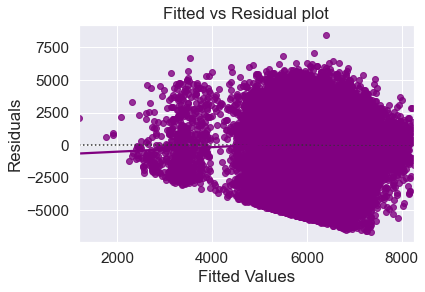

<IPython.core.display.Javascript object>

In [155]:
# plot of fitted values vs residuals
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Observation:
- There is an underrepresented age group in the predictions that divides the residuals, which is interesting.
- **Overall, there is not a definitive pattern, so we will consider the assumptions of independence and linearity sufficiently met to permit interpretation of coefficients.**
- We will be testing further for homoscedasticity, via the Goldfeld-Quandt test.

### Test for Normality

#### Histogram

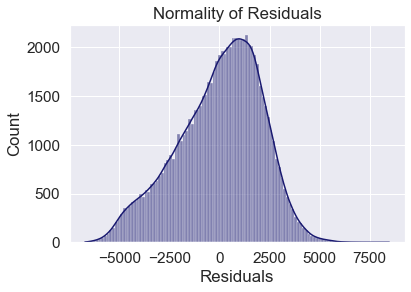

<IPython.core.display.Javascript object>

In [156]:
# Histogram of residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of Residuals")
plt.show()

#### Q-Q plot

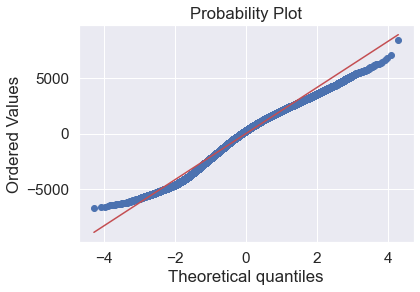

<IPython.core.display.Javascript object>

In [157]:
# checking the Q-Q plot
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

#### Observations:
- The distribution of the residuals does have an overall bell shape, but is quite peaked at ~8, with a thicker tail on the negative end.
- As we saw during EDA, there are possibly two Guassian's here.
- The Q-Q plot and the histogram show that the distribution is left-skewed.
- **We cannot strictly say that the assumption of normally distributed residuals is met.**
- Our plan is to apply other modeling algorithms, so we will see how they compare.

### Test for Homoscedasticity

#### Goldfeld-Quandt Test

In [158]:
# Goldfeld-quandt test
name = ["F statistic", "p-value"]
gq_test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, gq_test)

[('F statistic', 1.0014901031881855), ('p-value', 0.4417131538497488)]

<IPython.core.display.Javascript object>

#### Observations:
- Since p-value is > 0.05, the residuals are homoscedastic.
- **The assumption of homoscedasticity is met.**
- **Not all of the assumptions of linear regression are strictly met.  However, we will accept them as sufficiently met to allow for guarded interpretation of coefficients.**

## Final Model Summary

### *olsmodel3* summary

In [159]:
print(olsmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:               age_sqrd   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     303.6
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        05:33:09   Log-Likelihood:            -7.0394e+05
No. Observations:               77624   AIC:                         1.408e+06
Df Residuals:                   77601   BIC:                         1.408e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

#### Final Model Performance on Train Set (***original scale for RMSE, MAE, MAPE***)

In [41]:
# Checking final model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel3, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,15.233724,11.558889,0.080882,0.080597,19.60564


<IPython.core.display.Javascript object>

#### Final Model Performance on Validation Set (***original scale for RMSE, MAE, MAPE***)

In [42]:
# Checking final model performance on test set
print("Testing Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel3, X_test, y_test)
olsmodel_test_perf

Testing Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,15.106249,11.498191,0.077296,0.076154,19.288851


<IPython.core.display.Javascript object>

#### Observations:
- With $R^2$ of only 0.081 on the train set, our model is underfitting.  The predictors are only able to explain ~8% of the variation from the mean actual age.
- Test $R^2$ of 0.077 indicates that the model is not overfitting, as it compares to that of the test set along with other measures.
- MAE of 11.5 suggests that the model can predict within a mean error of 11.5 years on the test data.
- MAPE of 19.3 on the test data means that we aree able to predict within ~19.3% of age.

## Interpreting *olsmodel3* Parameters

In [45]:
# For loop to make list of parameters with p-values < 0.05
# Final model predictors
final_pred = X_train

# initial list of all independent variable columns excluding constant
cols = final_pred.columns[1:]

# initial list of columns to interpret
features_to_interp = []

# for loop to create list of features with p < 0.05
for feature in cols:
    p_value = olsmodel3.pvalues[feature]
    if p_value < 0.05:
        features_to_interp.append(feature)

print(
    "Features with interpretable coefficient confidence intervals: \n\n",
    features_to_interp,
)

Features with interpretable coefficient confidence intervals: 

 ['recip_num_references', 'years_sqrd', 'region_Asia', 'region_Central Asia', 'region_Mid-Cent America/Caribbean', 'region_Middle East', 'region_North America', 'region_Russian Federation', 'region_South America', 'region_South East Asia', 'prior_region_Europe', 'prior_region_Middle East', 'prior_region_Russian Federation', 'prior_region_South East Asia', 'known_for_arts', 'known_for_business_farming', 'known_for_crime', 'known_for_law_enf_military_operator', 'known_for_sciences', 'known_for_spiritual', 'known_for_sports', 'known_for_three_to_five', 'known_for_two']


<IPython.core.display.Javascript object>

#### Interpreting Final Features Coefficients (p-values < 0.05)

In [73]:
# creating a dataframe of features, coefficients, and interpretations
interp_df = pd.DataFrame(olsmodel3.params).loc[features_to_interp, :].reset_index()
interp_df.rename({"index": "Feature", 0: "Coefficient"}, axis=1, inplace=True)

# title for interpretation column
title = "Impact on Age (all else constant; compared to reference levels for category)"

# for loop to indicate how used price % changes in relation to feature dependent on feature type/transformation
for i, feature in enumerate(interp_df["Feature"]):

    # for mutliplicative inverse transformed features based on 10-fold factor change in feature
    if feature.startswith("recip"):
        interp_df.loc[
            i, title
        ] = f"geometrically diminishing decrease in years with increase in {feature.removeprefix('recip_')}"

    # for categorical one hot encoded
    elif feature.startswith('region'):
        interp_df.loc[
            i, title
        ] = f"{np.round(np.sqrt(np.abs(interp_df.loc[i, 'Coefficient'])), 2)} year change with {feature}"
        
    # for categorical one hot encoded
    elif feature.startswith('prior_region'):
        interp_df.loc[
            i, title
        ] = f"{np.round((interp_df.loc[i, 'Coefficient']), 2)} year change with {feature}"

    # for categorical one hot encoded
    elif feature.startswith('known_for'):
        interp_df.loc[
            i, title
        ] = f"{np.round((interp_df.loc[i, 'Coefficient']), 2)} year change with {feature}"
    # for numeric not transformed
    else:
        interp_df.loc[
            i, title
        ] = f"{np.round(interp_df.loc[i, 'Coefficient']*10, 2)} year change with 10 unit change in {feature}"

pd.set_option("max_colwidth", 100)
interp_df


,Feature,Coefficient,Impact on Age (all else constant; compared to reference levels for category)
0,recip_num_references,1321.756980,geometrically diminishing decrease in years with increase in num_references
1,years_sqrd,0.927734,9.28 year change with 10 unit change in years_sqrd
2,region_Asia,-312.383722,17.67 year change with region_Asia
3,region_Central Asia,-1497.198153,38.69 year change with region_Central Asia
4,region_Mid-Cent America/Caribbean,-524.513525,22.9 year change with region_Mid-Cent America/Caribbean
5,region_Middle East,-660.299203,25.7 year change with region_Middle East
6,region_North America,198.687053,14.1 year change with region_North America
7,region_Russian Federation,-692.310314,26.31 year change with region_Russian Federation
8,region_South America,-395.856546,19.9 year change with region_South America
9,region_South East Asia,-798.025431,28.25 year change with region_South East Asia


<IPython.core.display.Javascript object>

In [ ]:
print('Complete')

# Chime notification when cell executes
chime.success()

#### Observations:



# [Proceed to Data Cleaning Part ]()

<a id='Appendix'></a>

# Appendix:  Model with Original Predictors and Target

#### Defining Independent and Dependent Variables for Train and Test Sets

In [184]:
# Creating list of predictor columns
predictor_cols = [
    "num_references",
    "years",
    "region",
    "prior_region",
    "known_for",
]

# Defining target column
target = "age"

# Defining independent and dependent variables
X_train, X_test = df[predictor_cols], test[predictor_cols]
y_train, y_test = df[target], test[target]


# One hot encoding independent categorical features
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Adding the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Typecasting independent variables as float
X_train = X_train.astype("float64")
X_test = X_test.astype("float64")

# Checking shape of train and test sets
print(f"There are {X_train.shape[0]} rows and {X_train.shape[1]} columns in X_train.")
print(f"There are {X_test.shape[0]} rows and {X_test.shape[1]} columns in X_test.\n")

# Checking a sample of train set
X_train.sample(2)

There are 77624 rows and 35 columns in X_train.
There are 19420 rows and 35 columns in X_test.



,const,num_references,years,region_Asia,region_Central Asia,region_Europe,region_Mid-Cent America/Caribbean,region_Middle East,region_North America,region_Oceania,region_Russian Federation,region_South America,region_South East Asia,prior_region_Asia,prior_region_Central Asia,prior_region_Europe,prior_region_Mid-Cent America/Caribbean,prior_region_Middle East,prior_region_No Prior Region,prior_region_North America,prior_region_Oceania,prior_region_Russian Federation,prior_region_South America,prior_region_South East Asia,known_for_arts,known_for_business_farming,known_for_crime,known_for_law_enf_military_operator,known_for_politics_govt_law,known_for_sciences,known_for_social,known_for_spiritual,known_for_sports,known_for_three_to_five,known_for_two
22195,1.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2984,1.0,6.0,21.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

In [185]:
# Checking a sample of test set
X_test.sample(2)

,const,num_references,years,region_Asia,region_Central Asia,region_Europe,region_Mid-Cent America/Caribbean,region_Middle East,region_North America,region_Oceania,region_Russian Federation,region_South America,region_South East Asia,prior_region_Asia,prior_region_Central Asia,prior_region_Europe,prior_region_Mid-Cent America/Caribbean,prior_region_Middle East,prior_region_No Prior Region,prior_region_North America,prior_region_Oceania,prior_region_Russian Federation,prior_region_South America,prior_region_South East Asia,known_for_arts,known_for_business_farming,known_for_crime,known_for_law_enf_military_operator,known_for_politics_govt_law,known_for_sciences,known_for_social,known_for_spiritual,known_for_sports,known_for_three_to_five,known_for_two
17535,1.0,15.0,28.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9389,1.0,27.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

In [186]:
# Fitting a linear model and displaying model summary
olsmodel_first = sm.OLS(y_train, X_train).fit()
print(olsmodel_first.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     238.9
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        05:41:36   Log-Likelihood:            -3.2067e+05
No. Observations:               77624   AIC:                         6.414e+05
Df Residuals:                   77589   BIC:                         6.417e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

### Model Performance Check

#### Functions to check model performance

In [187]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs((targets - predictions) / targets)) * 100


# function to compute and display different metrics to check performance of a regression model
# with conversion back to original scale for RMSE, MAE, and MAPE for ease of explainability
def model_performance_regression(model, predictors, target):
    """
    Function to compute and return a dataframe of different metrics to check
    regression model performance
    
    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    # predictions
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

#### Model Performance on Train Set

In [188]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel_first, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,15.060556,11.686281,0.094782,0.094374,19.293232


<IPython.core.display.Javascript object>

### Model Performance on Test Set

In [189]:
# Checking model performance on validation set
print("Test Peformance\n")
olsmodel_test_perf = model_performance_regression(olsmodel_first, X_test, y_test)
olsmodel_test_perf

Test Peformance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,14.944189,11.614262,0.091933,0.090294,18.976059


<IPython.core.display.Javascript object>

### Checking Linear Regression Assumptions

### Test for Multicollinearity

#### Function to check VIF of Each Independent Variable

In [190]:
# Define a function to check and display VIF of each independent variable
def checking_vif(predictors):
    """
    Takes input dependent variables predictors and returns
    a dataframe of variable name and VIF
    """
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

#### VIF

In [191]:
# Checking vif
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,386.104273
18,prior_region_No Prior Region,16.896340
15,prior_region_Europe,10.310022
8,region_North America,7.831226
24,known_for_arts,7.488702
5,region_Europe,7.115662
32,known_for_sports,5.416156
28,known_for_politics_govt_law,5.004680
34,known_for_two,4.389235
3,region_Asia,3.186025


<IPython.core.display.Javascript object>

#### Function to Treat Multicollinearity

In [192]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

#### Checking Impact of Dropping Columns on Model Performance

In [193]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,prior_region_No Prior Region,0.094275,15.064870
1,known_for_politics_govt_law,0.093737,15.069348
2,prior_region_Europe,0.093648,15.070086
3,known_for_arts,0.090741,15.094237
4,known_for_sports,0.084806,15.143416
5,region_Europe,0.082356,15.163669
6,region_North America,0.081403,15.171545


<IPython.core.display.Javascript object>

#### Dropping `prior_region_No Prior Region`

In [194]:
# Dropping prior_region_No Prior Region column
col_to_drop = "prior_region_No Prior Region"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,67.893495
8,region_North America,7.828351
23,known_for_arts,7.488379
5,region_Europe,7.114584
31,known_for_sports,5.416144
27,known_for_politics_govt_law,5.004672
33,known_for_two,4.389165
3,region_Asia,3.184403
28,known_for_sciences,2.683464
9,region_Oceania,2.311788


<IPython.core.display.Javascript object>

#### Checking Impact of Dropping Columns on Model Performance

In [195]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,known_for_politics_govt_law,0.093626,15.070270
1,known_for_arts,0.090621,15.095226
2,known_for_sports,0.084699,15.144301
3,region_Europe,0.082215,15.164840
4,region_North America,0.081240,15.172892


<IPython.core.display.Javascript object>

#### Dropping `known_for_politics_govt_law`

In [196]:
# Dropping known_for_politics_govt_law column
col_to_drop = "known_for_politics_govt_law"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,39.616701
8,region_North America,7.805538
5,region_Europe,7.084284
3,region_Asia,3.181441
9,region_Oceania,2.309964
23,known_for_arts,1.853729
7,region_Middle East,1.725259
11,region_South America,1.661597
30,known_for_sports,1.627588
6,region_Mid-Cent America/Caribbean,1.551307


<IPython.core.display.Javascript object>

#### Checking Impact of Dropping Columns on Model Performance

In [197]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,region_Europe,0.081140,15.173712
1,region_North America,0.080232,15.181209


<IPython.core.display.Javascript object>

#### Dropping `region_Europe`

In [198]:
# Dropping region_Europe column
col_to_drop = "region_Europe"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,13.799340
22,known_for_arts,1.839280
29,known_for_sports,1.618095
31,known_for_two,1.471180
7,region_North America,1.299965
26,known_for_sciences,1.251142
3,region_Asia,1.154850
25,known_for_law_enf_military_operator,1.136670
28,known_for_spiritual,1.092388
8,region_Oceania,1.092099


<IPython.core.display.Javascript object>

#### Fitting Second Model

In [199]:
# Fitting a linear model and displaying model summary
olsmodel_first2 = sm.OLS(y_train, X_train).fit()
print(olsmodel_first2.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     222.1
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        05:42:03   Log-Likelihood:            -3.2123e+05
No. Observations:               77624   AIC:                         6.425e+05
Df Residuals:                   77592   BIC:                         6.428e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

#### Checking Features with High Coefficient p-values

In [200]:
## Loop for Dropping variables with high coefficient p-values one at a time excluding constant and dummy variables
# Current model predictors
train_predictors = X_train

# initial list of all independent variable columns including constant
cols = train_predictors.columns.to_list()

# initial empty list of independent variables to exclude
excluded_features = []

# setting an initial max p_value
max_p_value = 1

for i in range(len(cols)):
    # defining the train set
    x_train_aux = train_predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues[cols]
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
        excluded_features.append(feature_with_p_max)
    else:
        break

print(f"Features with high p-values to exclude: {excluded_features}")

Features with high p-values to exclude: ['known_for_social', 'prior_region_Central Asia', 'prior_region_South America', 'known_for_business_farming', 'region_Oceania', 'prior_region_Mid-Cent America/Caribbean', 'prior_region_North America', 'prior_region_Oceania', 'prior_region_Asia']


<IPython.core.display.Javascript object>

#### Dropping `excluded_features` with High p-values

In [201]:
# Dropping excluded_features
X_train.drop(excluded_features, axis=1, inplace=True)
X_test.drop(excluded_features, axis=1, inplace=True)

<IPython.core.display.Javascript object>

#### Fitting Third Model

In [202]:
# fitting third model and printing summary
olsmodel_first3 = sm.OLS(y_train, X_train).fit()
print(olsmodel_first3.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     312.7
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        05:42:18   Log-Likelihood:            -3.2123e+05
No. Observations:               77624   AIC:                         6.425e+05
Df Residuals:                   77601   BIC:                         6.427e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

### Test for Linearity and Independence

#### Dataframe of Actual, Fitted, and Residual Values

In [208]:
# Dataframe of actual, fitted, and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel_first3.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel_first3.resid  # residuals

df_pred.sample(5)

,Actual Values,Fitted Values,Residuals
18270,71.0,76.916558,-5.916558
31410,85.0,75.231451,9.768549
72535,82.0,72.790537,9.209463
10234,81.0,82.313117,-1.313117
29418,72.0,78.221934,-6.221934


<IPython.core.display.Javascript object>

#### Plot of Fitted Values vs Residuals

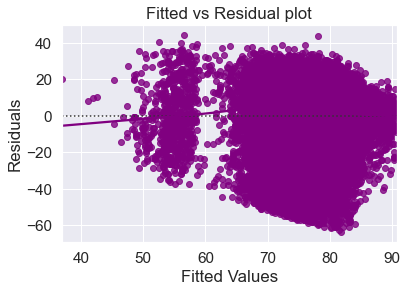

<IPython.core.display.Javascript object>

In [209]:
# Plot of fitted values vs residuals
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### Test for Normality

#### Histogram

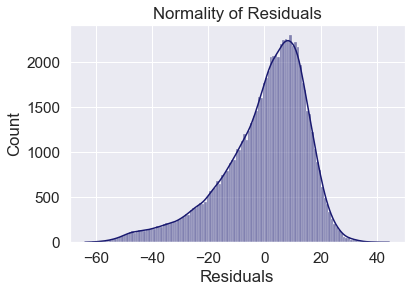

<IPython.core.display.Javascript object>

In [210]:
# Histogram of residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of Residuals")
plt.show()

#### Q-Q plot

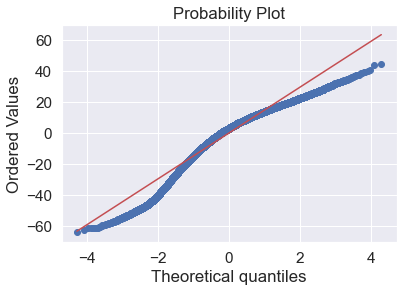

<IPython.core.display.Javascript object>

In [211]:
# checking the Q-Q plot
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

### Test for Homoscedasticity

#### Goldfeld-Quandt Test

In [212]:
# Goldfeld-quandt test
name = ["F statistic", "p-value"]
gq_test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, gq_test)

[('F statistic', 1.002331359610872), ('p-value', 0.409313587747999)]

<IPython.core.display.Javascript object>